# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | ta`u
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | remire-montjoly
Processing Record 11 of Set 1 | sungai penuh
Processing Record 12 of Set 1 | barinas
Processing Record 13 of Set 1 | flin flon
Processing Record 14 of Set 1 | fallon
Processing Record 15 of Set 1 | sagua la grande
Processing Record 16 of Set 1 | yatou
Processing Record 17 of Set 1 | toga village
City not found. Skipping...
Processing Record 18 of Set 1 | pangoa
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | colonia
Processing Re

In [14]:
from pprint import pprint
pprint(city_data[0])

{'City': 'waitangi',
 'Cloudiness': 46,
 'Country': 'NZ',
 'Date': 1718828878,
 'Humidity': 88,
 'Lat': -43.9535,
 'Lng': -176.5597,
 'Max Temp': 9.34,
 'Wind Speed': 1.79}


In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,9.34,88,46,1.79,NZ,1718828878
1,adamstown,-25.0660,-130.1015,22.05,74,0,8.43,PN,1718828878
2,tiksi,71.6872,128.8694,2.16,83,94,1.53,RU,1718828878
3,ta`u,-14.2336,-169.5144,27.32,81,40,7.79,AS,1718828879
4,chonchi,-42.6128,-73.8092,6.73,83,78,1.56,CL,1718828879


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.34,88,46,1.79,NZ,1718828878
1,adamstown,-25.0660,-130.1015,22.05,74,0,8.43,PN,1718828878
2,tiksi,71.6872,128.8694,2.16,83,94,1.53,RU,1718828878
3,ta`u,-14.2336,-169.5144,27.32,81,40,7.79,AS,1718828879
4,chonchi,-42.6128,-73.8092,6.73,83,78,1.56,CL,1718828879


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

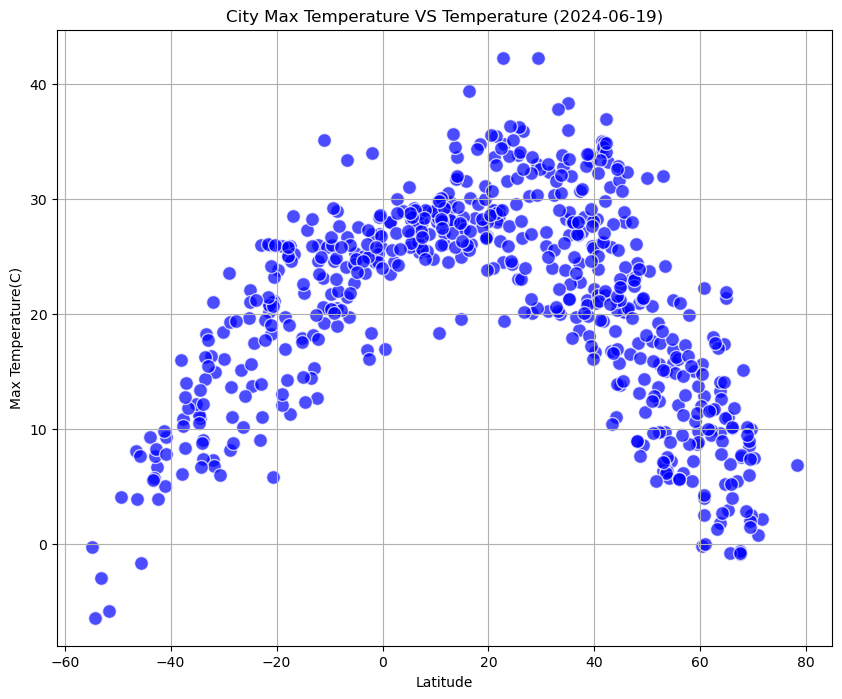

In [24]:
# Build scatter plot for latitude vs. temperature
import datetime as dt
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']
date_first = city_data_df['Date'].iloc[0]
utc_date = dt.datetime.utcfromtimestamp(date_first)

plt.figure(figsize=(10, 8))
plt.scatter(lat, temp, edgecolor='white', linewidth=1, color='blue', s=100, alpha= 0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Max Temperature VS Temperature ({utc_date.strftime('%Y-%m-%d')})")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

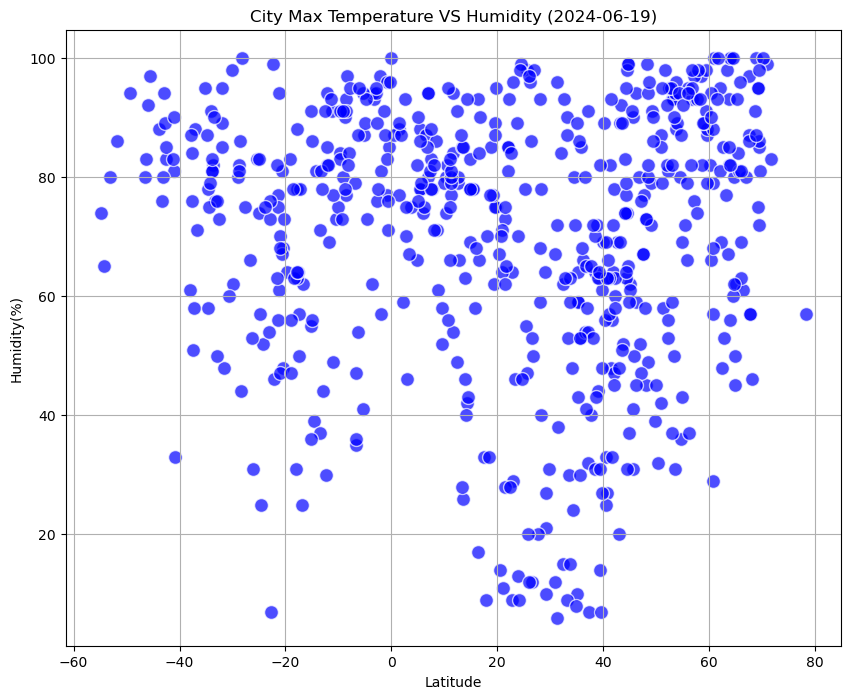

In [25]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']

# Incorporate the other graph properties
plt.figure(figsize=(10, 8))
plt.scatter(lat, humidity, edgecolor='white', linewidth=1, color='blue', s=100, alpha= 0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Max Temperature VS Humidity ({utc_date.strftime('%Y-%m-%d')})")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

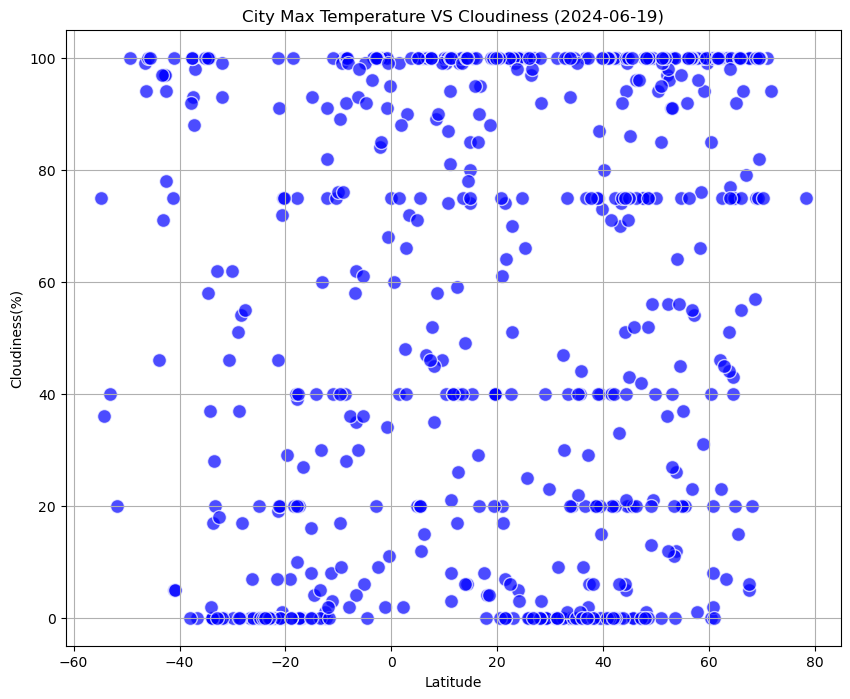

In [26]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.figure(figsize=(10, 8))
plt.scatter(lat, cloudiness, edgecolor='white', linewidth=1, color='blue', s=100, alpha= 0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Max Temperature VS Cloudiness ({utc_date.strftime('%Y-%m-%d')})")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

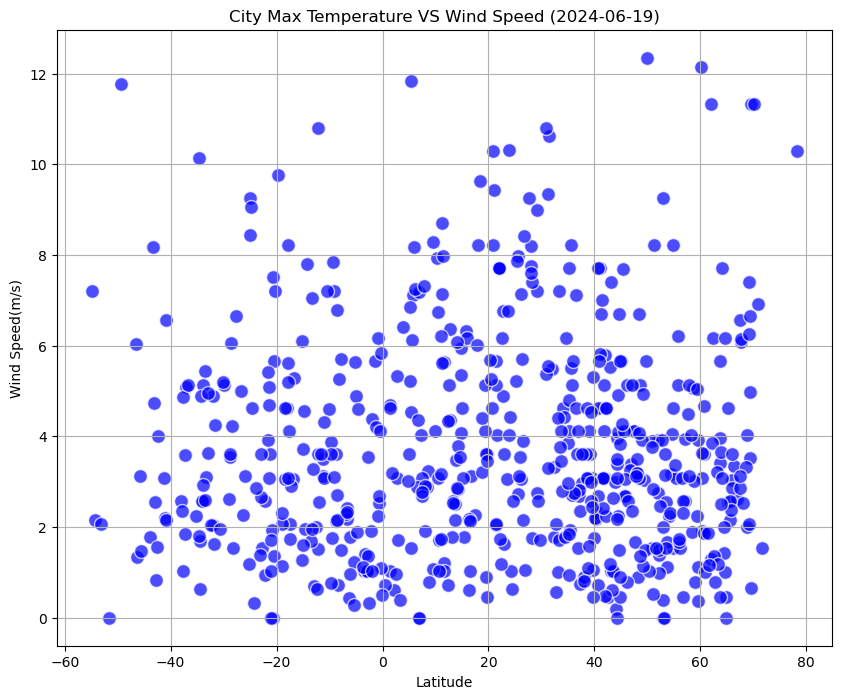

In [27]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.figure(figsize=(10, 8))
plt.scatter(lat, wind_speed, edgecolor='white', linewidth=1, color='blue', s=100, alpha= 0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title(f"City Max Temperature VS Wind Speed ({utc_date.strftime('%Y-%m-%d')})")

plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label):
    """
    Create a scatter plot with a linear regression line and annotate the regression equation.
    
    Parameters:
    - x: array-like, the x data
    - y: array-like, the y data
    - x_label: str, the label for the x-axis
    - y_label: str, the label for the y-axis
    - title: str, the title of the plot
    """

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    # Create regression line values
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Plot data and regression line
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, edgecolor='white', linewidth=1, color='blue', s=100)
    plt.plot(x, regress_values, 'r-', label="Regression Line")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add regression line equation as annotation
    plt.annotate(line_eq, xy=(x.mean(), regress_values.mean()), xytext=(x.mean() + 10, regress_values.mean() + 10),
                 textcoords='data', fontsize=12, color='red',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white'),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='red'))

    # Add legend
    plt.legend(loc="best")

    # Show plot
    plt.show()
    
    # Return Rvalue
    return slope, intercept, rvalue, pvalue, stderr

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df.loc[:, 'Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tiksi,71.6872,128.8694,2.16,83,94,1.53,RU,1718828878
6,whitehorse,60.7161,-135.0538,22.28,29,20,3.60,CA,1718828880
8,remire-montjoly,4.9167,-52.2667,31.02,66,20,3.60,GF,1718828880
10,barinas,8.6226,-70.2075,28.96,71,58,3.23,VE,1718828836
11,flin flon,54.7682,-101.8650,16.91,36,75,8.23,CA,1718828881


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df.loc[:, 'Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,9.34,88,46,1.79,NZ,1718828878
1,adamstown,-25.0660,-130.1015,22.05,74,0,8.43,PN,1718828878
3,ta`u,-14.2336,-169.5144,27.32,81,40,7.79,AS,1718828879
4,chonchi,-42.6128,-73.8092,6.73,83,78,1.56,CL,1718828879
5,hithadhoo,-0.6000,73.0833,28.42,71,68,2.54,MV,1718828879


###  Temperature vs. Latitude Linear Regression Plot

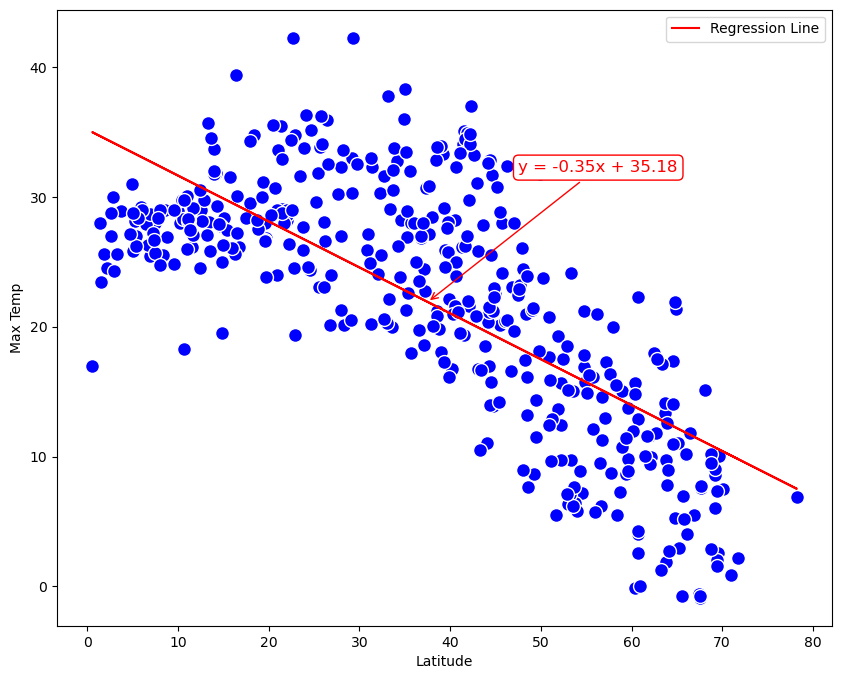

In [29]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat'].values
y = northern_hemi_df['Max Temp'].values
slope, intercept, rvalue, pvalue, stderr = create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")

In [30]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.7255355967734334


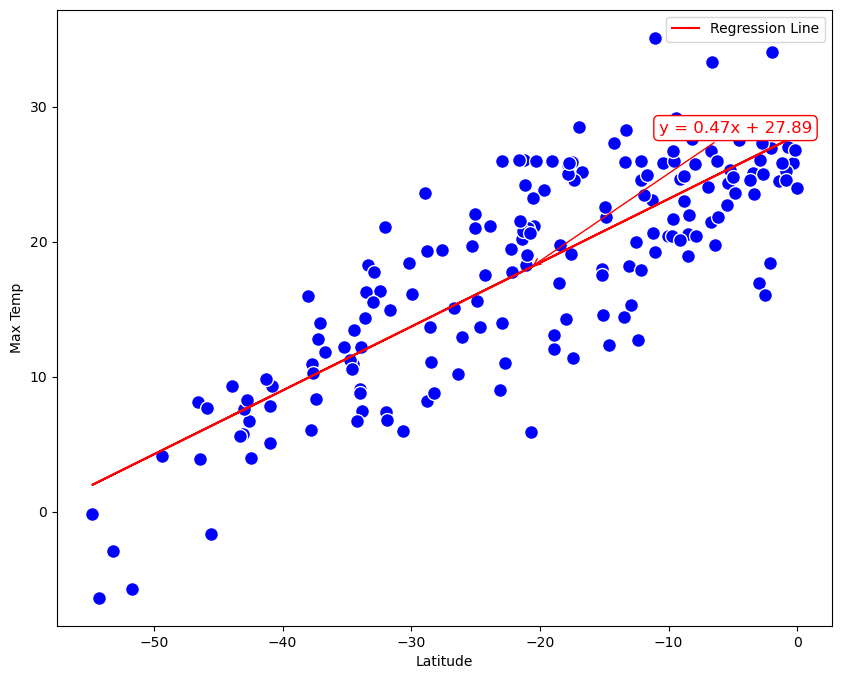

In [31]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat'].values
y = southern_hemi_df['Max Temp'].values
slope, intercept, rvalue, pvalue, stderr = create_linear_regression_plot(x, y, x_label="Latitude", y_label="Max Temp")

In [32]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.8175028071944141


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Analysis:

1. These two scatter plots and their regression lines reveal the impact of latitude on maximum temperature.

- The first scatter plot and its regression line show that cities at higher latitudes generally have lower maximum temperatures.
- The second scatter plot and its regression line show that cities at higher latitudes in the Southern Hemisphere (closer to the equator) generally have higher maximum temperatures.

2. Comparison of slopes
- Northern Hemisphere: A negative slope (-0.35) indicates that as you move from the equator towards the North Pole, temperatures decrease.
- Southern Hemisphere: A positive slope (0.47) indicates that as you move from the South Pole towards the equator, temperatures increase.

### Conclusion:

- The relationship between latitude and maximum temperature is reasonable in terms of geography and climatology because regions closer to the equator typically have higher temperatures, while those near the North or South Poles have lower temperatures.

- The contrast between hemispheres further proves the significant impact of geographic latitude on temperature, an effect consistent globally.

### Humidity vs. Latitude Linear Regression Plot

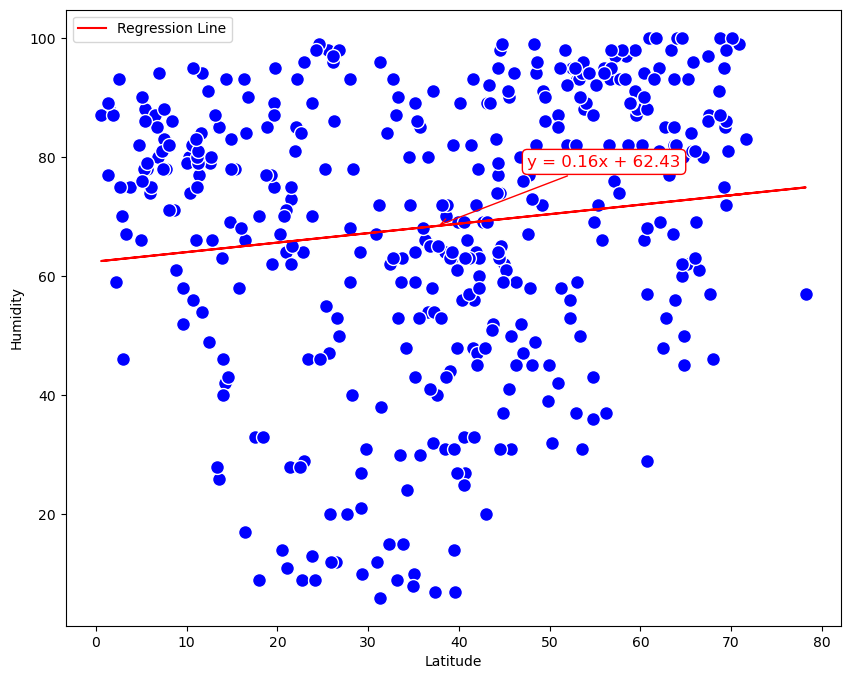

In [33]:
# Northern Hemisphere
x = northern_hemi_df['Lat'].values
y = northern_hemi_df['Humidity'].values
slope, intercept, rvalue, pvalue, stderr = create_linear_regression_plot(x, y, x_label="Latitude", y_label="Humidity")

In [34]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.13089649894023864


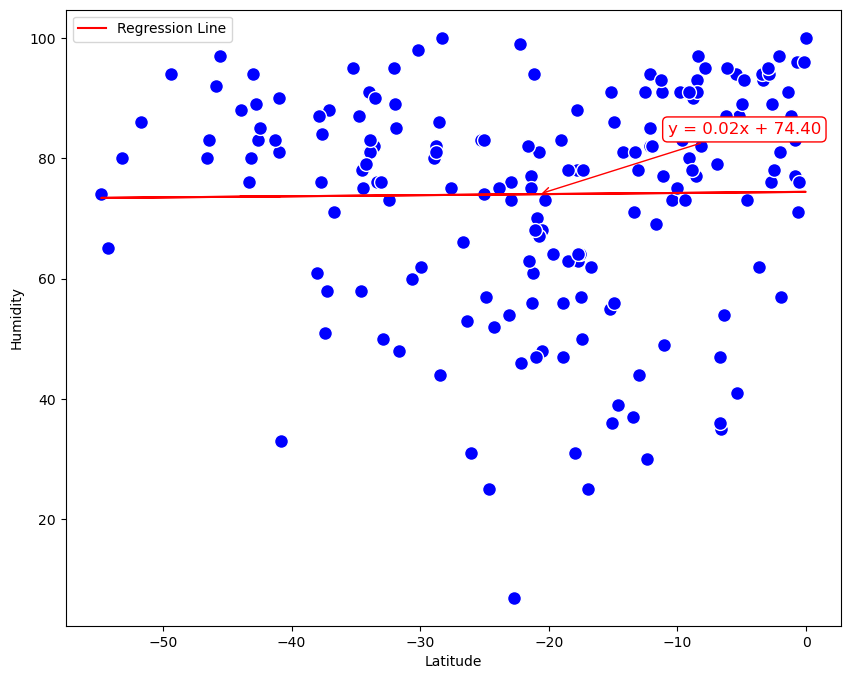

In [37]:
# Southern Hemisphere
x = southern_hemi_df['Lat'].values
y = southern_hemi_df['Humidity'].values
slope, intercept, rvalue, pvalue, stderr = create_linear_regression_plot(x, y, x_label="Latitude", y_label="Humidity")

In [38]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.013714803549070828


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Analysis

1. The impact of latitude on humidity is weak:

    - In the Northern Hemisphere, the slope is positive (0.16), indicating a slight upward trend in humidity with increasing latitude, but the relationship is very weak.
    - In the Southern Hemisphere, the slope is even smaller (0.02), almost negligible, suggesting that latitude has an even less significant effect on humidity.

2. Very low correlation: The r values for both hemispheres are very low, 0.13 and 0.01 respectively, indicating that there is almost no linear correlation between latitude and humidity in either hemisphere.

3. High data dispersion: The scatter plots in both graphs are highly dispersed without any obvious linear trend, further demonstrating that the relationship between latitude and humidity is not significant.

### Conclusion

Overall, both graphs indicate that whether in the Northern or Southern Hemisphere, the influence of latitude on humidity is very weak and almost non-existent. This suggests that humidity may be influenced by other more complex climatic factors and geographical features rather than just changes in latitude alone. When analyzing humidity distribution, more variables and factors should be considered instead of focusing solely on latitude.


### Cloudiness vs. Latitude Linear Regression Plot

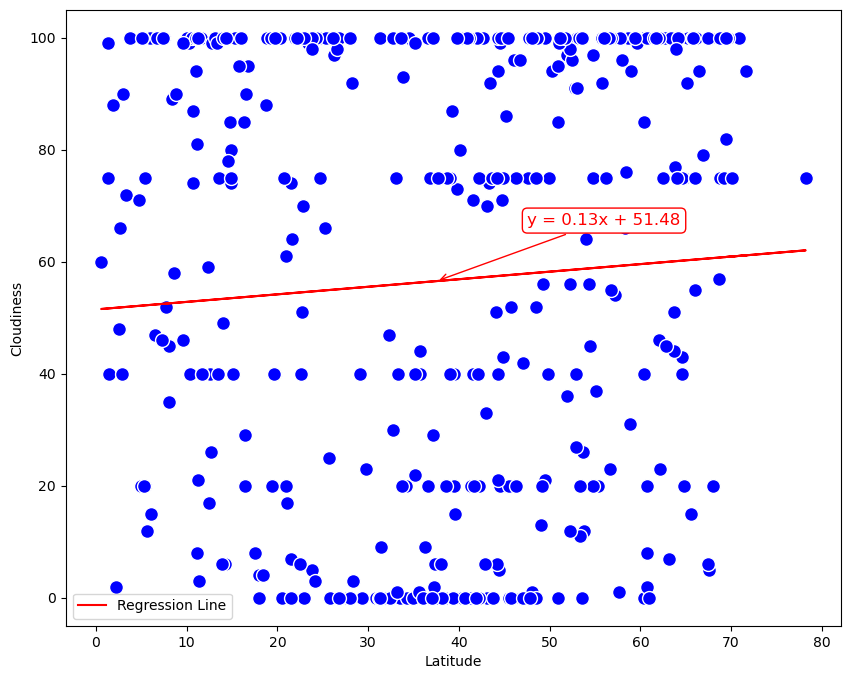

In [39]:
# Northern Hemisphere
x = northern_hemi_df['Lat'].values
y = northern_hemi_df['Cloudiness'].values
slope, intercept, rvalue, pvalue, stderr = create_linear_regression_plot(x, y, x_label="Latitude", y_label="Cloudiness")

In [40]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.06580640768597007


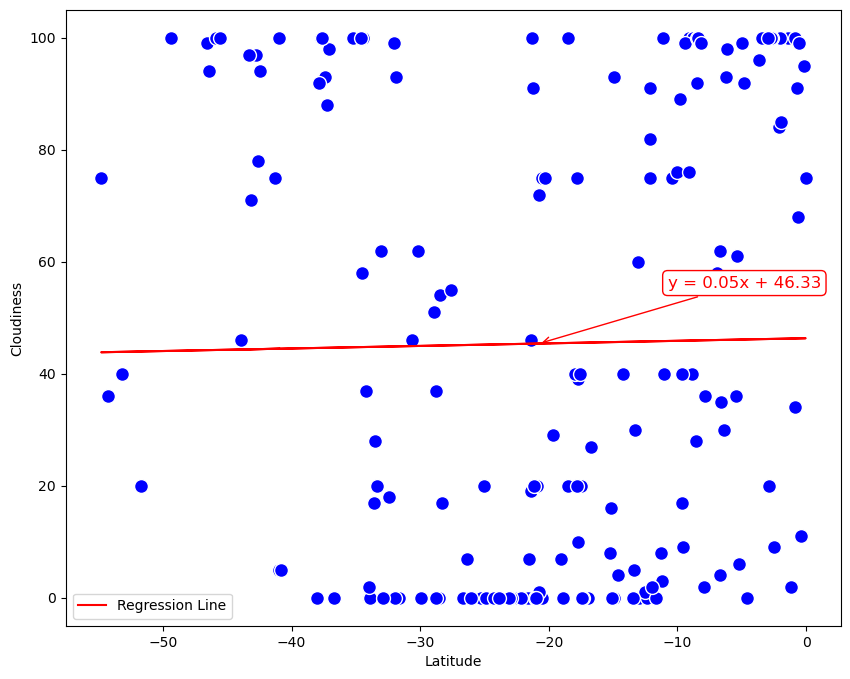

In [41]:
# Southern Hemisphere
x = southern_hemi_df['Lat'].values
y = southern_hemi_df['Cloudiness'].values
slope, intercept, rvalue, pvalue, stderr = create_linear_regression_plot(x, y, x_label="Latitude", y_label="Cloudiness")

In [42]:
print(f"The r-value is: {rvalue}")

The r-value is: 0.015535538555343896


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Analysis

1. The impact of latitude on cloud cover is weak:

    - In the Northern Hemisphere, although the slope is positive (0.13), indicating a slight increase in cloud cover with increasing latitude, this relationship is very weak.
    - In the Southern Hemisphere, the slope is even smaller (0.05), almost negligible, suggesting that the influence of latitude on cloud cover is even less significant.

2. Very low correlation: The r-value for both the Northern and Southern Hemispheres are very low, 0.066 and 0.015 respectively, indicating that there is almost no linear correlation between latitude and cloud cover in either hemisphere.

3. High data dispersion: In both charts, scatter points are widely dispersed without any obvious trend, further demonstrating that there isn't a significant relationship between latitude and cloud cover.

### Conclusion

Overall, these two charts indicate that whether in the Northern or Southern Hemisphere, the effect of latitude on cloud cover is very weak and nearly non-existent in terms of correlation. This suggests that cloud cover may be influenced by other more complex climatic factors and geographical features rather than just changes in latitude alone. When studying cloud distribution, more variables and factors should be considered instead of focusing solely on latitude.


### Wind Speed vs. Latitude Linear Regression Plot

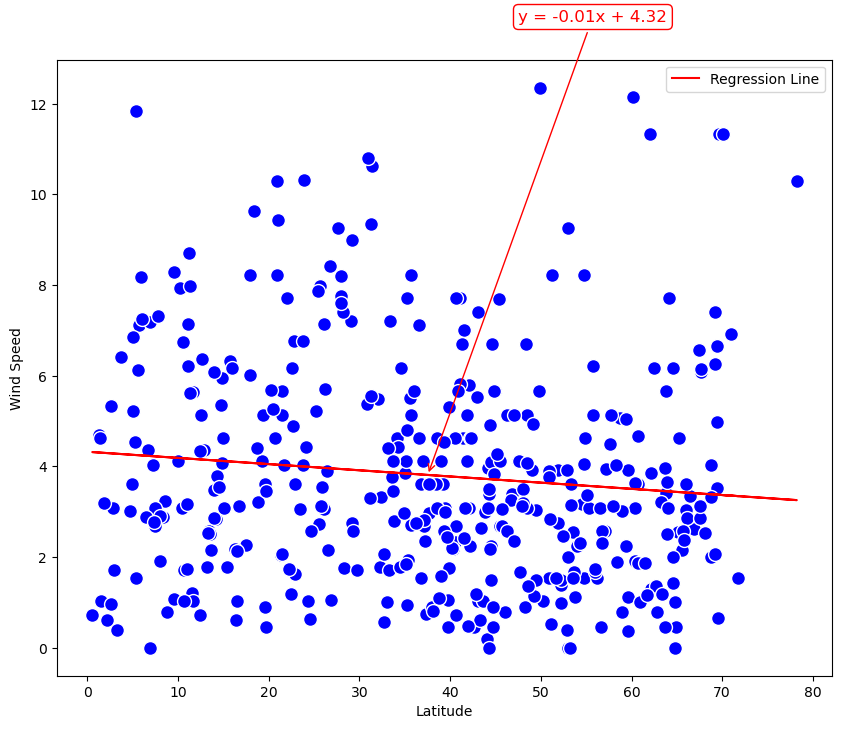

In [43]:
# Northern Hemisphere
x = northern_hemi_df['Lat'].values
y = northern_hemi_df['Wind Speed'].values
slope, intercept, rvalue, pvalue, stderr = create_linear_regression_plot(x, y, x_label="Latitude", y_label="Wind Speed")

In [44]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.10583802928378294


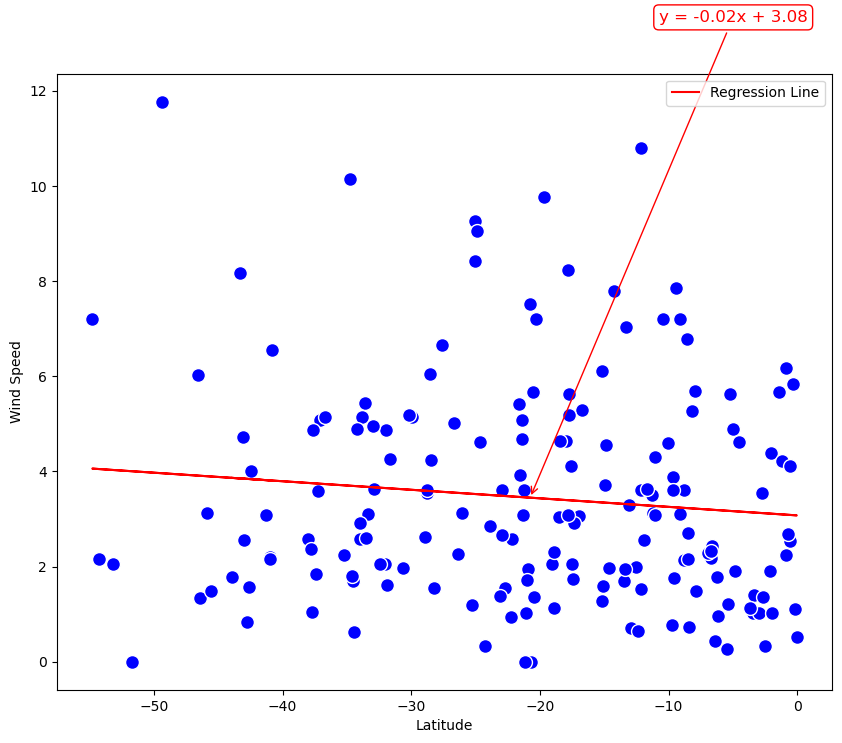

In [45]:
# Southern Hemisphere
x = southern_hemi_df['Lat'].values
y = southern_hemi_df['Wind Speed'].values
slope, intercept, rvalue, pvalue, stderr = create_linear_regression_plot(x, y, x_label="Latitude", y_label="Wind Speed")

In [46]:
print(f"The r-value is: {rvalue}")

The r-value is: -0.1064393504700854


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Analysis

1. The impact of latitude on wind speed is minimal:

    - In the Northern Hemisphere, the slope is -0.01, indicating a slight decrease in wind speed with increasing latitude, but this relationship is very weak.
    - In the Southern Hemisphere, the slope is -0.02, also indicating a slight decrease in wind speed with increasing latitude, but this relationship is similarly very weak.

2. Very low correlation: The r-value for both the Northern and Southern Hemispheres is approximately -0.106, suggesting that there is almost no linear correlation between latitude and wind speed in either hemisphere.

3. High data dispersion: In both charts, scatter points are widely dispersed without any clear trend, further illustrating that the relationship between latitude and wind speed is not significant.

### Conclusion

Overall, these two charts indicate that whether in the Northern or Southern Hemisphere, the influence of latitude on wind speed is very minimal and almost non-existent. This suggests that wind speed may be influenced by other more complex climatic factors and geographical features rather than just changes in latitude. When studying wind speed distribution, more variables and factors should be considered instead of focusing solely on latitude.


## Overall Conclusion

Based on the analysis of the above four dimensions, the following conclusions are drawn:

1. Latitude has a significant impact on maximum temperature: There is a clear linear relationship between latitude in both hemispheres and maximum temperature, with higher temperatures near the equator and lower temperatures near the poles.

2. Latitude has a weak influence on humidity, cloud cover, and wind speed, with almost no significant linear relationship. This indicates that these meteorological factors are more influenced by other complex factors (such as local topography, oceanic effects, seasonal changes) rather than just changes in latitude.

3. Other influencing factors need to be considered:

    - For variables such as humidity, cloud cover, and wind speed, local geographic and climatic conditions should be taken into account more when studying and predicting them. Future analyses can incorporate more meteorological and geographical data for a more comprehensive understanding of the relationships between these variables.
    
    - Using more complex analytical models with multiple independent variables may provide more accurate prediction results.